# Model Analysis
Asaf Silman

## Overview
This notebook will assist in analysing the model performance against different datasets.
Model config will be loaded from the `model_config.xlsx` workbook.
Raw datasets will be specified in the notebook.

The notebook will create the processed dataset using the specified datasets, and the model configuration.

## Importing dependencies

This notebook is located under `notebooks/eda/`, therefore kernel path must be updated to properly load the source code.

In [1]:
# RUN THIS CELL ONLY ONCE

%cd ../..

/Users/asafsilman/Desktop/GENG5511/GalaxyEnvironmentAnalysis


In [2]:
from src.config.load_config import load_config
from src.config.load_workbook import load_workbook

from src.model.model_info import ModelInfo
from src.model.galaxy_model import GalaxyModelClassifier
from src.data.model_data_set import ModelDataset

from src.model.get_ROC_curve import get_ROC_curve
from src.model.get_confusion_matrix import get_confusion_matrix

import logging

## Load config
Load the root config, and the model config workbook

In [31]:
root_config = load_config("config.yml")
model_config, data_config = load_workbook(root_config)

In [4]:
logging_level = logging.INFO
logging.basicConfig(format='%(levelname)s %(message)s', level=logging_level)

## Load model info

In [17]:
MODEL_NAME = "2_channel_categorical_gas_density_star_density_m1m2m3"
# MODEL_DATA_SETS = ["m1", "m2", "m3", "m4", "m4a", "m5", "m6", "m7", "m8"]
MODEL_DATA_SETS = ["m4", "m5", "m6"]

In [32]:
model_info = ModelInfo(MODEL_NAME, model_config, data_config)
model_info.model_data_sets = MODEL_DATA_SETS

In [33]:
model = GalaxyModelClassifier(model_info, root_config)

In [34]:
ans = input("Running this cell will delete existing data sets.\n\
Are you sure you want to run this cell? (y/n)\n")

if (ans.lower() == "y"):
    model.model_data_set.create_model_data_set(single_output=True)

INFO Processing group 1/9
INFO Processing group 2/9
INFO Processing group 3/9
INFO Processing group 4/9
INFO Processing group 5/9
INFO Processing group 6/9
INFO Processing group 7/9
INFO Processing group 8/9
INFO Processing group 9/9


In [35]:
data_set = model.model_data_set.load_model_data_set(single_output=True)

In [36]:
model.load_model()
model.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [37]:
predict, predict_scores, correct, correct_scores = model._get_predictions(data_set)

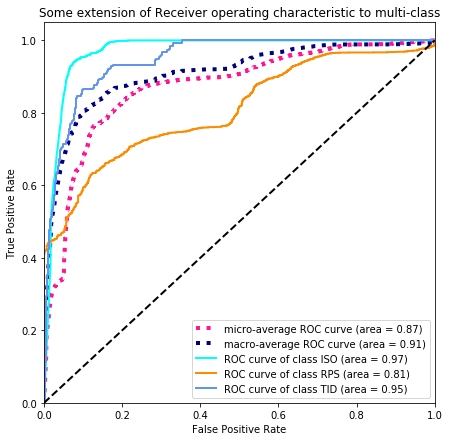

In [38]:
get_ROC_curve(predict_scores, correct_scores, True).show()

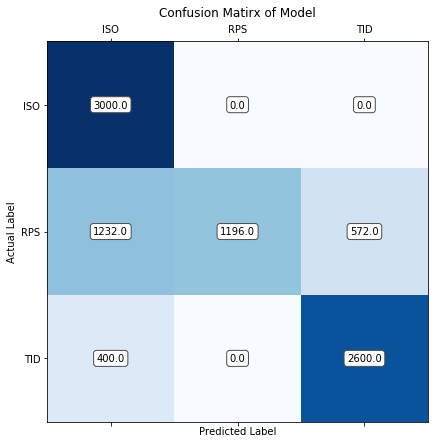

In [39]:
get_confusion_matrix(predict, correct, True).show()

In [111]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

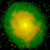

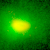

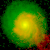

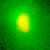

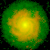

In [120]:
import numpy as np
from src.utils.show_image import show_image

image, label = next(iter(data_set.shuffle(500)))
image = image.numpy()
label = label.numpy()

for i in range(32):
    if np.argmax(label[i]) == 1:
        image_new = np.concatenate([image[i]*255, np.zeros([50,50, 1])], axis=-1)
        showarray(image_new)
        